                                word embeddings
-> Word Embeddings são representações numéricas densas de palavras. Em termos
simples, eles transformam palavras (que são dados categóricos/texto) em vetores
de números reais (dados numéricos) em um espaço de alta dimensão.

                        A ideia Principal: O vetor Significa Contexto
-> O objetivo principal dos embeddings é representar o significado de uma palavra pelo o seu contexto. Palavras que são usadas em contextos semelhantes
(e, portanto, têm significados semelhantes) terão vetores embedding próximos
umas das outras no espaço vetorial.

                        Como Eles Funcionam (Propriedades Chave)
-> Dimensionalidade Reduzida e Densa: Em vez de usar a técnica antiga de "One-Hot Encoding" (onde o vetor teria milhares de zeros), um embedding
tipico tem apenas algumas centenas de dimensões (ex: 100, 300 ou 768). O
vetor é denso porque a maioria dos seus não é zero.

-> Captura de Relacionamentos Semânticos: Essa é a parte mágica. Os embeddings
são treinados para capturar a relação entre palavras. Por exemplo: Se pegarmos
o vetor da palavra rei e substrair o vetor de homem, e depois somar o vetor de
mulher, o vetor resultante será muito próximo ao vetor da palavra rainha

Vetor(Rei) - Vetor(Homem) + Vetor(Mulher) = Vetor(Rainha).

-> Eles capturam relações como capital-pais, verbo-tempo, e gênero.

-> Os emebeddings não são criados manualmente, eles são aprendidos por modelos de machine learning (redes neurais) que processam grandes quantidades de texto.

                            Bag-of-Words (Saco de Palavras)
-> É um modelo de representação de texto que ignora a gramatica e a ordem das
palavras, focando apenas na frequência de ocorrência de cada palavra de um documento. Imagine um "saco de palavras" de onde você retira todas as palavras
de um documento, mas as joga de volta sem se preocupar com a ordem em que foram
retiradas.

                                Como Funciona
-> O processo de criação de representação Bag-of-Words envolve duas etapas principais:

-> Criar o vocabulário (o "Saco"): O modelo primeiro escaneia todos os documentos no seu corpus (conjunto de textos) e cria uma lista de todas as palavras únicas que aparecem. Essa list é o vocabulário do modelo.

Criar o Vetor de Frequência: Para cada documento individual. é criado um vetor. O tamanho desse vetor é igual ao tamanho do vocabulário. Cada posição
(coluna) no vetor corresponde a uma palavra única do vocabulário.
  O valor na posição é a contagem (frequência) de quantas vezes aquela palavra apareceu naquele documento especifico.

                            Vantagens
-> Simples e Rápido: Fácil de entender e de implementar (com CountVectorizer ou TfidVectorizer no scikit-learn).

-> Escalável: Funciona bem mesmo com grandes volumes de texto

-> Funciona com Classificadores Tradicionais: É a representação ideal para algoritmos como Regressão Logistica, Naive Bayes e SVM.


                            Desvantagens
-> Perde a ordem: Ignora a ordem das palavras, perdendo contexto crucial (ex: "Bom, mas não muito" vs "Não é muito bom").

-> Vetor Esparso: Para vocabulários grandes (milhares de palavras), a maioria dos valores nos vetores será zero.

-> Não captura Significado/Relação: Palavras com o mesmo significado (sinônimos) são tratadas como totalmente diferentes.

-> Em resumo, Bag-Of-Words é um modelo que transforma documentos em vetores de
frequência, permitindo que algoritmos de Machine Learning os processem, mas sacrifica o contexto e a ordem das palavras.

                                Bag-Of-Words
                                

                Criando o documento que irá compor o vocabulário

In [ ]:
# Lista de palavras (documento que irá compor o vocabulário de palavras
# do bag-of-words)
corpus = [

    # Cada linha representa um documento diferente, onde a frequência dos valores únicos do vocabulário são contados de acordo com a quantidade de vezes que um valor aparece em cada documento (em cada linha )
    'Esse é o primeiro documento',
    
    'Esse é o segundo',
    
    'Seria esse o primeiro?'

]

In [ ]:
# Import da classe CountVectorizer do módulo sklearn.feature_extraction.text
# da biblioteca CountVectorizer que tem como objetivo criar um vocabulário 
# de palavras utilizando os valores do corpus (documentos que contém valores
# categóricos) com o objetivo de alimentar modelos de machine learning com
# textos.
from sklearn.feature_extraction.text import CountVectorizer

# Instância da classe CountVectorizer
vectorizer = CountVectorizer()

# Nesta etapa vamos treinar a classe com o objetivo de construir o vocabulário
# usando os valores do corpus 
vectorizer.fit(corpus)

# Impressão do atributo vocabulary da classe CountVectorizer que tem como
# objetivo mostrar o mapeamento de cada palavra única para o seu indice de
# coluna (valor) na futura matriz de valores. 
print("Vocabulário: ", vectorizer.vocabulary_)

Vocabulário:  {'esse': 1, 'primeiro': 2, 'documento': 0, 'segundo': 3, 'seria': 4}


In [ ]:
# Irá aplicar o vocabulário mapeado nos dados do corpus (irá transformar
# o corpus em um vocabulário).
vector = vectorizer.transform(corpus)

print("Encoded Document is: ")

# Irá imprimir a matriz de valores usando a função toarray
print(vector.toarray())

Encoded Document is: 
[[1 1 1 0 0]
 [0 1 0 1 0]
 [0 1 1 0 1]]


                    Interpretação da matriz de valores
-> Tem como objetivo mostrar a frequência de cada posição do vocabulário (palavra) em cada documento (linha do
corpus). Por exemplo:

Vocabulário:  {'esse': 1, 'primeiro': 2, 'documento': 0, 'segundo': 3, 'seria': 4}

Encoded Document is: 
[[1 1 1 0 0]
 [0 1 0 1 0]
 [0 1 1 0 1]]

 Se análisarmos o primeiro documento (linha 1 da matriz) teremos:

 -> documento (posição 0 no vocabulário e na matriz de valores): Aparece apenas 1 vez no primeiro documento.

 -> esse (posição 1 no vocabulário e na matriz de valores): Aparece apenas 1 vez no primeiro documento.

 -> primeiro (posição 2 no vocabulário e na matriz de valores): Aparece apenas 1 vez no primeiro documento.

 -> segundo (posição 3 no vocabulário e na matriz de valores): Não Aparece nenhuma vez no primeiro documento. 

 -> seria (posição 4 no vocabulário e na matriz de valores): Não aparece nenhuma vez no primeiro documento.


                                            Criando um detector de fake news utilizando o bag-of-words
-> A idéia é utilizar o bag-of-words para treinar um modelo de machine learning para classificar noticias
falsas e verdadeiras

                                                                Carregando o Dataset na Memória

In [ ]:
# Import da biblioteca pandas que tem como objetivo carregar e manipular os dados de 
# um dataset.
import pandas as pd

# Função da biblioteca que irá carregar os dados
base_de_dados = pd.read_excel('Dados/FakeRecogna.xlsx')

                                                            Visualizando as 10 primeiras linhas do dataset

In [5]:
base_de_dados.head(10)

,Titulo,Subtitulo,Noticia,Categoria,Data,Autor,URL,Classe
0,\n\nPapa Francisco foi preso sob acusação de t...,Boato – Ocorreu um apagão no Vaticano. O papa ...,apagão vaticano papar presar acusação tráfico ...,entretenimento,11/01/2021,\nEdgard Matsuki,https://www.boatos.org/religiao/papa-francisco...,0.0
1,Equador prepara cova coletiva para mortos por ...,NaN,o governar equador anunciar preparar cova cole...,saúde,27/03/2020 18h25,27/03/2020 18h25,https://noticias.uol.com.br/internacional/ulti...,1.0
2,Air France voltará a operar voo direto Pequim-...,NaN,o companhia air france operar voar direto pequ...,saúde,07/08/2020 13h42,07/08/2020 13h42,https://www.uol.com.br/nossa/noticias/afp/2020...,1.0
3,Marfrig intensifica venda de carne do Brasil a...,NaN,o marfrig global foods retomar vender carnar b...,saúde,27/04/2020 14h53,27/04/2020 14h53,https://economia.uol.com.br/noticias/reuters/2...,1.0
4,As parciais das eleições de 2014 alternaram ma...,NaN,o assunto voltar o compartilhar rede social ju...,entretenimento,31/07/2021,Gilmar Lopes,https://www.e-farsas.com/as-parciais-das-eleic...,0.0
5,\n\nMacron mandou polícia fechar igreja de San...,"Boato – O presidente da França, Emmanuel Macro...",durante o santo missar policiar obedecer o ord...,mundo,NaN,\nEdgard Matsuki,https://www.boatos.org/mundo/macron-mandou-pol...,0.0
6,Coronavírus: sindicatos dos inquilinos convoca...,NaN,greve pagamento aluguel organizar sindicato in...,saúde,30/03/2020 10h38,30/03/2020 10h38,https://noticias.uol.com.br/internacional/ulti...,1.0
7,"\n\nPrograma Renda Brasil +Crédito, com crédit...",Boato – O governo federal lançou o programa Re...,o cadastramento programar render brasil crédit...,entretenimento,02/10/2020,\nEdgard Matsuki,https://www.boatos.org/tecnologia/programa-ren...,0.0
8,Os cheiros que podem desaparecer para sempre,"Aromas da vida cotidiana, como o cheiro do caf...",imaginar livrar passar ano guardar estante fol...,ciência,16/07/2020 18h10,Por BBC,https://g1.globo.com/ciencia-e-saude/noticia/2...,1.0
9,\n\nVacina contra Covid-19 faz imunidade do co...,Boato – Imunidade do corpo diminui após pessoa...,“ reação vacinar entender facilidade pessoa in...,saúde,27/04/2021,\nKyene Becker,https://www.boatos.org/saude/vacina-contra-cov...,0.0


                                                        Visualizando as Informações Gerais do Dataset

In [6]:
base_de_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11903 entries, 0 to 11902
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Titulo     11872 non-null  object 
 1   Subtitulo  5580 non-null   object 
 2   Noticia    11902 non-null  object 
 3   Categoria  11902 non-null  object 
 4   Data       11551 non-null  object 
 5   Autor      11886 non-null  object 
 6   URL        11902 non-null  object 
 7   Classe     11902 non-null  float64
dtypes: float64(1), object(7)
memory usage: 744.1+ KB


Wordcloud (nuvem de palavras) de fake news

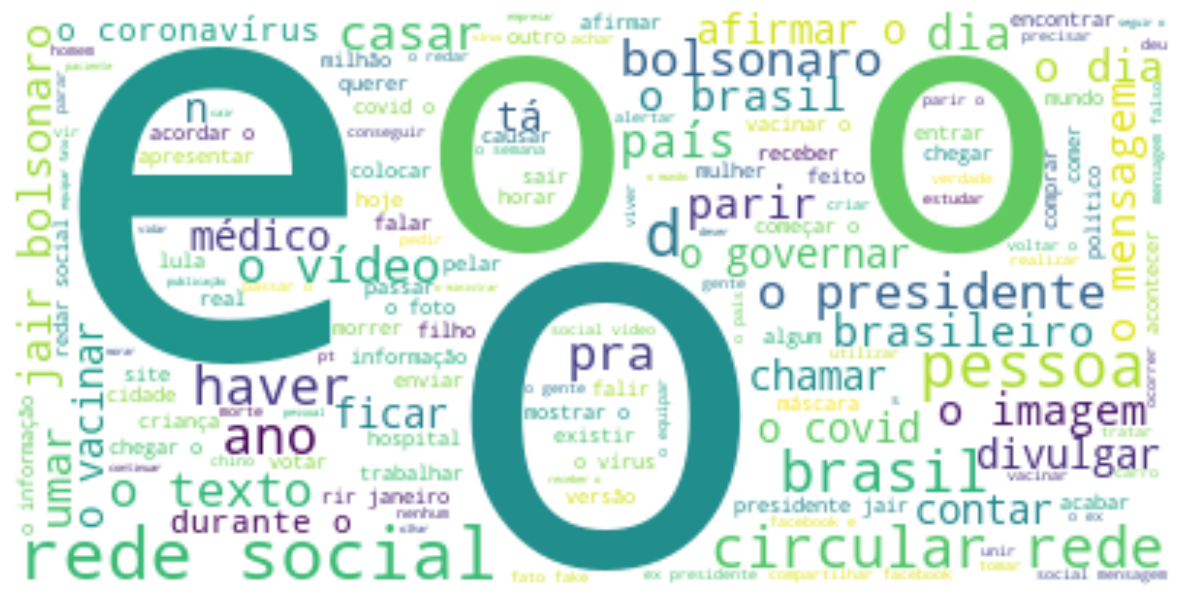

In [ ]:
# Import do módulo pyplot da biblioteca matplotlib que tem como 
# objetivo criar e manipular gráficos.
import matplotlib.pyplot as plt

# Import da classe WordCloud da biblioteca WordCloud que tem como objetivo
# criar uma nuvem com as palavras mais frequentes de uma string.
from wordcloud import WordCloud

# Irá filtrar as noticias falsas da base de dados. Basicamente,
# iremos acessar a coluna "Classe" e selecionaremos apenas as 
# linhas que possuem noticias classificadas como 0 (noticias
# falsas)
noticias_falsas = base_de_dados[base_de_dados["Classe"] == 0]

# Como a função generate do WordCloud necessita de apenas uma string como
# argumento, vamos fazer uma espécie de pré-processamento que irá converter
# os dados do formato pandas para o formato strings.

# " ": sinal que será concatenado com os valores através do join com o
# objetivo de transformar os valores em strings.

# join: Irá percorrer a coluna de noticias da variável noticias_falsas (base
# de dados que contém apenas noticias falsas) e concatenará os valores com
# as " " que irão transforma-los em string. Dessa maneira, teremos o formato
# ideal que possibilita que a variável text_falso seja passada como argumento
# para a função generate do wordcloud que constrói nuvens de palavras
text_falso = " ".join(i for i in noticias_falsas['Noticia'])

# Instância da classe WordCloud: O construtor da classe recebe como argumento
# o atributo background_color que irá definir a cor de fundo da nuvem.

# generate: Função da classe WordCloud que cria a nuvem de palavras usando
# como argumento uma string (o text_falso convertido no nosso caso) 
wordcloud = WordCloud(background_color="white").generate(text_falso)

# Define o tamanho da figura da nuvem
plt.figure(figsize=(15,10))

# Função do matplotlib usada para exibir dados como uma imagem. A função
# recebe como argumento:

# wordcloud: Objeto que criamos anteriormente. Ele contém a nuvem de palavras
# como uma matriz de pixels (dados da imagem). O imshow pega esses dados e os
# renderiza na tela.

# interpolation: Este é um parâmetro opcional, mas importante. Ele
# controla como os pixels são exibidos se a imagem precisar ser redimensionada
# ( esticada ou comprimida) para caber na tela.

# Billinear: É um algoritmo de interpolação que suaviza a transição entre os
# pixels adjascentes. Em essência, ele faz com que a imagem final (a nuvem de
# palavras) pareça mais suave e menos pixelizada do que se você usasse uma
# interpolação mais simples (como 'nearest').

plt.imshow(wordcloud, interpolation='bilinear')

# É usado para controlar a aparência dos eixos e das bordas do gráfico
# no matplotlib. Este comando instrui o matplotlib a desligar (remover
# ) todos os elementos visuais de plotagem que são tipicos de gráficos de
# dados.
plt.axis("off")

# Irá exibir a nuvem de palavras no terminal
plt.show()

        Verificando os 1000 Primeiros Caracteres da String text_falso 
            

In [8]:
text_falso[:1000]

'apagão vaticano papar presar acusação tráfico criança e fraude .. o papar francisco tuitou manhã o curador beaver confirmar o papar francisco equipar rede social agendar publicação e planejada antecedência clicar tweet o tweetdeck agendar o publicação.o papar francisco custódio federal itália vestir vídeo o fbi o interrogatório fontes.oficiais militar policiar italiano e unidade crime sexual o casar papar vaticano prender e policiar alto e colocar prisão incidente pessoa relatar ouvir tiro o polícia confirmar atirar armas.o papar francisco encontra-se atualmente prisão desconhecido interrogar agente federar trabalhar o itália e interpol acordar relatório o fbi arranjar voar e interrogá-lo o interpol terminar ele.giuseppe governale o procurador-chefe antimafia itália chamar comedir pesquisar o papar francisco e vaticano o ′′ subestimar ′′ e particularmente perigoso dever capacidade proliferar nação e infiltrar n realizar o prisão policiar e militar cortar o energia vaticano atenuar o c

                    WordCloud das noticias verdadeiras

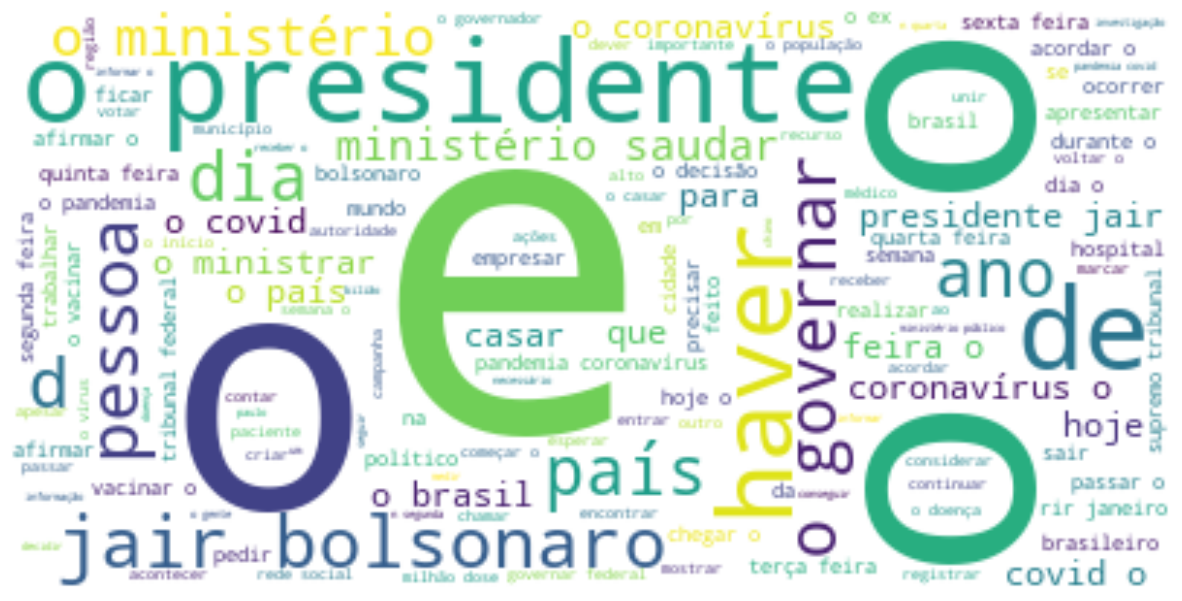

In [ ]:
# Irá filtrar as noticias verdadeiras da base de dados. Basicamente,
# vamos acessar a coluna "Classe" e selecionar todas as linhas que 
# são classificadas como 1 (noticias verdadeiras).
noticias_verdadeiras = base_de_dados[base_de_dados["Classe"] == 1]

# Como vimos anteriormente, precisamos converter os dados de pandas para 
# string para conseguirmos utiliza-los na função generate.

# " ": Sinal que será concatenado através do join com o objetivo de converter
# os dados para string

# join: Irá percorrer a coluna "Noticia" da base de dados da coluna de
# verdadeiros e concatenará os dados com a string com o objetivo de transformar
# a serie pandas em uma string.
text_verdadeiro = " ".join(i for i in noticias_verdadeiras['Noticia'])

# Instância da classe wordcloud que irá conter a função generate que
# constrói nuvens de palavras, 
wordcloud = WordCloud(background_color="white").generate(text_verdadeiro)

# Define o tamanho da imagem da nuvem
plt.figure(figsize=(15,10))

# Possibilita que os dados sejam mostrados em forma de imagem através de uma
# matriz de pixels
plt.imshow(wordcloud, interpolation='bilinear')

# Desabilita elementos visuais tipicos de gráficos
plt.axis("off")

# Irá exibir a nuvem no terminal.
plt.show()

                        Verificando os 1000 Primeiros Caracteres da String text_verdadeiro

In [10]:
text_verdadeiro[:1000]

'o governar equador anunciar preparar cova coletiva cemitério enterrar morto coronavírus cidade guaiaquil país divulgar o sepultura ficar pronto o redar ecuavisa sepulcro construir homenagem s vítima o governar federal negociar o prefeitura quaiaquil o cova o manhã hoje o cidade registrar caso confirmar covid-19 o município atingir vírus o país ministrar interior maría paula romo declarar entrevisto redar agência funerário trabalhar disponível função tocar recolher impor presidente lenín moreno o companhia air france operar voar direto pequim e parir agostar o o capital chinês e o europa o fechamento conexão aéreo pandemia coronavírus diferente fonte n sexta-feira dever s norma sanitário chinês o voar destinar o tianjin o cercar quilômetros pequim voltar o voar aeroporto pequim capital o air france confirmar informação embaixada frança chino o voar semanal empresar o frança e o chino atualmente o companhia aéreo operar conexão semanal o aeroporto parir charlar gaulle e xangai o frança 

                              Classificação

In [ ]:
# Irá selecionar apenas a coluna de noticias e classe, pois, para esse exercicio iremos precisar apenas dessas 2 colunas.
base_de_dados_novos_rotulos = base_de_dados[['Noticia', 'Classe']]

# Função do pandas que irá apagar os valores nulos da base de dados filtrada.
base_de_dados_novos_rotulos = base_de_dados_novos_rotulos.dropna()

                            Separando os Valores das Colunas

In [ ]:
# Ira conter apenas os valores da coluna Noticia
noticias = base_de_dados_novos_rotulos.Noticia

# Irá conter apenas os valores da coluna classe
rotulos = base_de_dados_novos_rotulos.Classe

            Verificando a Frequência dos Valores Únicos da coluna classe

In [13]:
rotulos.value_counts()

Classe
0.0    5951
1.0    5951
Name: count, dtype: int64

-> Podemos observar que a frequência de noticias falsas (0) e de noticias verdadeiras (1) são iguais

            Verificando os Dados da Coluna Classe em um Histograma

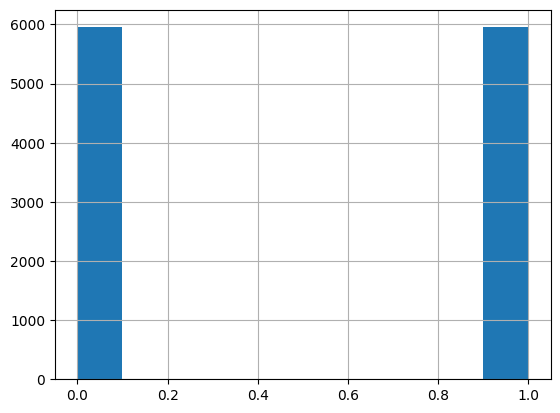

In [ ]:
# hist: Função que tem como objetivo construir um histograma que mostra a
# distribuição (frequência) dos valores únicos de uma coluna.
rotulos.hist()

# Irá exibir o histograma na tela.
plt.show()

                    Separação dos Dados em Treino e Teste

In [ ]:
# Import da função train_test_split do módulo model_selection da 
# biblioteca sklearn que tem como objetivo separar os dados em treino
# teste.
from sklearn.model_selection import train_test_split

# xtrain: Irá conter o conjunto de treino da classe noticias que irá ensinar
# o modelo a encontrar padrões e tendências nas caracteristicas que irão ajudar
# o modelo a realizar predições.

# xtest: Caracteristicas (valores da coluna noticia) que o modelo irá utilizar
# para realizar predições.

# ytrain: Conjunto de treino da coluna rotulos (variável alvo da predição)
# que irá ensinar como o modelo deve realizar a predição ou classificação
# dos dados.

# ytest: Dados reais que serão comparados com a predição do modelo.

# Train_test_split: Função que irá separar os dados em treino e teste. A
# função irá receber como argumento:

# noticias: valores que serão as caracteristicas que o modelo irá utilizar
# para realizar predições. 

# rotulos: Variável alvo da predição do modelo

# test_size: Irá conter o tamanho do conjunto de teste. Os demais valores
# serão atribuidos ao conjunto de treino.
xtrain, xtest, ytrain, ytest = train_test_split(noticias, rotulos, test_size=0.1)

# Irá mostrar os dados do conjunto de teste
print(xtest)

9861     doação ar condicionar campanha solidário magaz...
326      o twitter afirmar n segunda-feira incluir aler...
2680     venezuelano agredir soldar brasileiro solo ven...
4756     o advocacia-geral união agu hoje o o jornal o ...
10845    rosar rosar receber fonte seguro o fonte infor...
                               ...                        
9968     o ministrar exterior ernesto araújo escolher o...
3059     postagens site e rede social enganir o o afirm...
8420     balançar vacinação covid-19 d sábado 23.077.02...
5392     o ministério saudar enviar o rir janeiro 249.2...
7939     o infectologista jaime rocha decidir dia grava...
Name: Noticia, Length: 1191, dtype: object


            Aplicando o Bag-Of-Words no modelo de classificação

In [ ]:
# Irá instanciar a classe CountVectorizer que criará o vocabulário
# usando os dados de xtrain(conjunto de treino da coluna de noticias)
bow_model = CountVectorizer()

# Ira aplicar o vocabulário nos dados de treino das caracteristicas (noticias) 
xtrain = bow_model.fit_transform(xtrain)

# Após treinar os dados, vamos aplicar o vocabulário (criado no conjunto de
# treino) nos dados de teste que o modelo usará para realizar predições
xtest = bow_model.transform(xtest)

                Visualizando a Dimensão do Array de Treino Xtrain

In [ ]:
# O shape tem como objetivo mostrar a dimensão do array numpy com o intuito
# de mostrar a quantidade de linhas e valores únicos.
xtrain.shape

(10711, 36704)

-> Podemos observar que o array numpy xtrain possui 10.711 linhas e 36.704 
valores únicos.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Instancia da classe MultinomialNB
modelo = MultinomialNB()

modelo.fit(xtrain, ytrain)

MultinomialNB()

In [19]:
print("Acurácia do treino (porcentagens de acertos no treino): ", round(modelo.score(xtrain, ytrain), 2))

print("Acurácia do teste (porcentagem de acertos do modelo): ", round(modelo.score(xtest, ytest), 2))

Acurácia do treino (porcentagens de acertos no treino):  0.93
Acurácia do teste (porcentagem de acertos do modelo):  0.91


                            Após 200 Tentativas

In [20]:
from tqdm import tqdm

sum_train = 0

sum_test = 0

for i in tqdm(range(200)):
    
    xtrain, xtest, ytrain, ytest = train_test_split(noticias, rotulos, test_size = 0.1)
    
    bow_model = CountVectorizer()
    
    xtrain = bow_model.fit_transform(xtrain)
    
    xtest = bow_model.transform(xtest)
    
    modelo = MultinomialNB()
    
    modelo.fit(xtrain, ytrain)
    
    sum_train = sum_train + modelo.score(xtrain, ytrain)
    
    sum_test = sum_test + modelo.score(xtest, ytest)

print("Média de acertos no treino: ", round(sum_train/200, 2))

print("Média de acertos no teste (acertos reais): ", round(sum_test/200, 2))

100%|██████████| 200/200 [04:25<00:00,  1.33s/it]

Média de acertos no treino:  0.93
Média de acertos no teste (acertos reais):  0.9
